# 1. 导入基本项目库

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 2. 导入相关数据

这里使用的数据是预先设计好的人造数据

In [ ]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
[9.779], [6.182], [7.59], [2.167], [7.042],
[10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
[3.366], [2.596], [2.53], [1.221], [2.827],
[3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
# 转换为 Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

绘制一下预设的数据，查看数据的分布

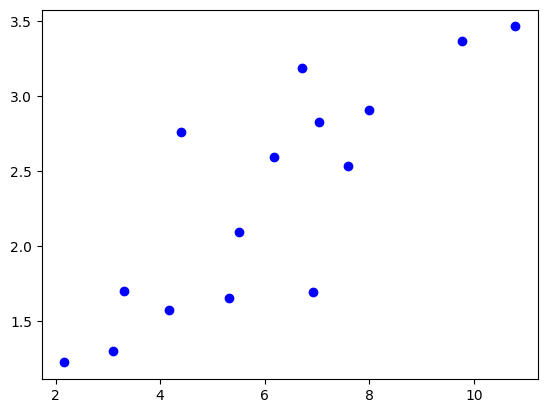

In [ ]:
# plot src data
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo')
plt.show()

这里大概可以看出来 x 和 y 基本上是符合线性关系，那么使用线性回归去拟合 x 和 y 的关系是合理的。

# 3. 构建模型
接下来就是定义线性模型：

In [4]:
# define the linear model
# y = w * x + b
w = torch.tensor([-1.], requires_grad=True)
b = torch.tensor([0.], requires_grad=True)

def linear_model(x):
    return x * w + b

这里线性回归模型的参数 w 和 b 是随意初始化的，绘制一下预测结果，理论上来讲肯定是不拟合的：

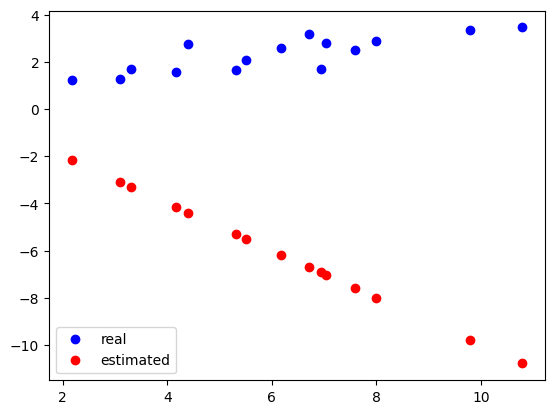

In [7]:
# plot estimate result before train
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()
plt.show()

# 4. 定义损失函数
对于线性回归模型来说，损失函数可以是预测结果与标准结果之间误差的平方和，也就是最小二乘法：

In [8]:
def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)

# 5. 利用梯度下降法进行训练迭代

In [9]:
# train 10 iteration
lr = 1e-2

for e in range(10):
    y_ = linear_model(x_train)

    # compute loss
    loss = get_loss(y_, y_train)
    loss.backward()

    # 手动更新参数
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data

    print("epoch: {}, loss: {}".format(e, loss))

    # reset the grad to zero
    w.grad.zero_()
    b.grad.zero_()

epoch: 0, loss: 79.35061645507812
epoch: 1, loss: 1.6737390756607056
epoch: 2, loss: 0.23599520325660706
epoch: 3, loss: 0.20918604731559753
epoch: 4, loss: 0.20848968625068665
epoch: 5, loss: 0.2082776129245758
epoch: 6, loss: 0.20807550847530365
epoch: 7, loss: 0.2078746259212494
epoch: 8, loss: 0.2076748162508011
epoch: 9, loss: 0.2074759602546692


训练结果如上所示，可以看到损失是不断在下降的，也就是说模型的精度在不断上升，再次绘制一下预测结果：

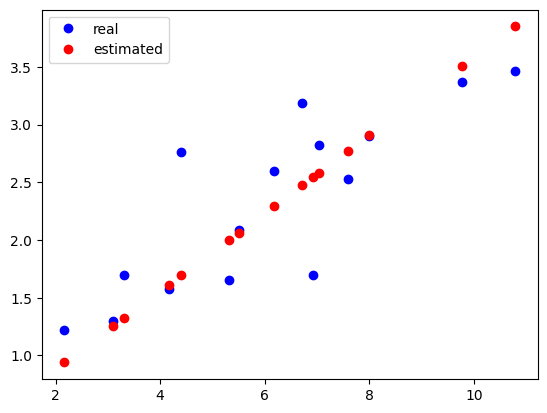

In [10]:
# plot estimate result after train
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()
plt.show()

这里可以看到，模型基本上是学习到了 x 和 y 之间的规律了。